<a href="https://colab.research.google.com/github/vicpb/deep-learning-cnn-udemy/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install tensforflow
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-07-09 13:21:59--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-07-09 13:22:00 (44.3 MB/s) - ‘moore.csv’ saved [2302/2302]



In [4]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1, 1) # make it a 2-D array of size N x D where D = 1
Y = data[:,1]

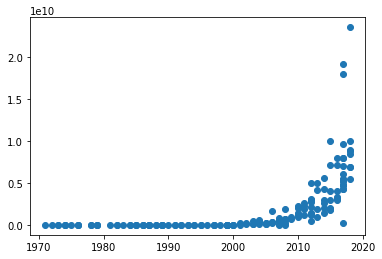

In [5]:
# Plot the data - it is exponential!
plt.scatter(X, Y)

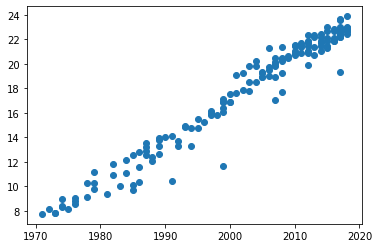

In [6]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X, Y)
# that's better

In [7]:
# Let's also center the X data so the values are not too large
# We could scale it too but then we'd have to reverse the transformation later
X = X - X.mean()

In [8]:
# Now create our Tensorflow model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Input(shape=(1,)),
                                    tf.keras.layers.Dense(1)
])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9), loss='mse')
# model.compile(optimizer='adam', loss='mse')

# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# Train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 1s 2ms/step - loss: 323.6876
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 290.7539
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 252.6988
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 206.9133
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 151.2453
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 118.4063
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 122.8030
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 73.4499
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 61.1766
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 35.7071
Epoch 11/200
6/6 [==============================] - 0s 3ms/step - loss: 26.6471
Epoch 12/200
6/6 [==============================] - 0s 3ms/step - loss: 19.4385
Epoch 13/200
6/6 [========================

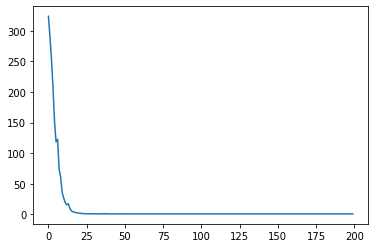

In [9]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

In [10]:
# Get the slope of the line
# The slope of the line is related to the doubling rate of transistor count
print(model.layers) # Note: there is only 1 layer, the "Input" layer doesn't count
print(model.layers[0].get_weights())

[array([[0.3450388]], dtype=float32), array([17.7621], dtype=float32)]


In [11]:
# The slope of the line is:
a = model.layers[0].get_weights()[0][0,0]

In [12]:
print("Time to double: ", np.log(2) / a)

Time to double:  2.0088963261056354


In [14]:
# If you know the analytical solution
X = np.array(X).flatten()
Y = np.array(Y)
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean()*X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)
print("Time to double: ", np.log(2) / a)

0.341682487387313 17.764939393631764
Time to double:  2.0286295205239204


In [ ]:
()